### 목표
- skip-gram방식으로 데이터셋을 직접 국축
- 학습된 임베딩 레이어에서 임베딩 벡터를 꺼내 시각화 해보자.

### 데이터셋 구축

In [ ]:
# 말뭉치 생성
corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'prince is a boy will be king',
          'princess is a girl will be queen']

### 불용어 처리

In [ ]:
def remove_stop_words(corpus):
  stop_words = ['is','a','will','be'] # 불용어 목록

  results = [] # 불용어가 제거된 문장이 들어갈 리스트
  for text in corpus:
    tmp = text.split(' ') # 토큰화
    for stop_word in stop_words:
      if stop_word in tmp: # 토큰화된 문장에 불용어가 들어있다면
        tmp.remove(stop_word) # 불용어제거
    results.append(' '.join(tmp))

  return results # 최종결과 반환


In [ ]:
corpus = remove_stop_words(corpus)

In [ ]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess uoung queen',
 'man strong',
 'prince boy king',
 'princess girl queen']

### 단어사전 구축

In [ ]:
words = [] # 단어들이 들어갈 리스트
for text in corpus:
  for word in text.split(' '): # 토큰화
    words.append(word) # 단어 토큰들을 리스트에 추가

words = set(words) # 집합을 이용해서 중복제거

In [ ]:
words

{'boy',
 'girl',
 'king',
 'man',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [ ]:
# 단어 인코딩
word2int = {} # key -> 단어 , valuse -> 번호

for i,word in enumerate(words): # enumerate:해당값도 꺼내면서 그 값의 인덱스까지 알고싶을때(인덱스와 값이 리턴됨)
  word2int[word]=i

In [ ]:
word2int

{'queen': 0,
 'strong': 1,
 'young': 2,
 'boy': 3,
 'woman': 4,
 'princess': 5,
 'prince': 6,
 'king': 7,
 'man': 8,
 'wise': 9,
 'girl': 10}

### Skip-gram 방식으로 데이터 전처리
- 중심단어 -> X(입력)
- 주변단어 -> y(출력)

In [ ]:
# 단어 토큰화
sentences = [] # 토큰화된 전체 문장이 담길 리스트

for sentence in corpus:
  sentences.append(sentence.split(' '))

In [ ]:
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [ ]:
# skip-gram

WINDOW_SIZE = 2 # 중심단어로부터 주변 단어를 몇 개까지 볼껀지
data = [] # skip-gram 처리된 데이터가 들어갈 리스트

# 토큰화된 각 문장별로 skip-gram을 진행
for s in sentences:
  for idx, word in enumerate(s): # 한 문장에서 각 토큰들이 중심단어가 되도록 함
    # 윈도우사이즈를 기반으로 중심단어로부터 주변단어 찾기
    for neighbor in s[max(idx-WINDOW_SIZE,0):min(idx+WINDOW_SIZE,idx+1)]:
      if neighbor != word: # 슬라이싱한거에서 중심단어를 뺴고
        data.append([word,neighbor]) #리스트에 중심단어, 주변단어 추가

In [ ]:
import pandas as pd
df = pd.DataFrame(data,columns=['X','y'])

In [ ]:
df

,X,y
0,strong,king
1,man,king
2,man,strong
3,wise,queen
4,woman,queen
5,woman,wise
6,young,boy
7,man,boy
8,man,young
9,young,girl


### 구축된 데이터를 숫자형태로 인코딩
- X -> 단어사전의 번호를 이용해 라벨인코딩
- y -> 확률정보로 변경(원핫인코딩)

In [ ]:
from tensorflow.keras.utils import to_categorical # 확률정보로 변경

In [ ]:
X_list = [] # 중심단어
y_list = [] # 주변단어

for x,y in zip(df['X'], df['y']): # zip : 같은 인덱스를 가진것 끼리 묶어줌
  X_list.append(word2int[x])
  y_list.append(word2int[y])

In [ ]:
X_list

[1, 8, 8, 9, 4, 4, 2, 8, 8, 2, 4, 4, 2, 7, 7, 2, 0, 0, 1, 3, 7, 7, 10, 0, 0]

In [ ]:
y_list

[7, 7, 1, 0, 0, 9, 3, 3, 2, 10, 10, 2, 6, 6, 2, 5, 5, 2, 8, 6, 6, 3, 5, 5, 10]

In [ ]:
y_one_hot = to_categorical(y_list) # 라벨인코딩된 정답을 확률정보로 변환
y_one_hot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 임베딩 모델 구축

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense
import numpy as np

In [ ]:
skip_gram_embedding_model = Sequential()
skip_gram_embedding_model.add(Embedding(11,2)) #임베딩레이어(단어수,표현될 숫자의 수) 한단어당 두개의 숫자로 표현되도록할거임 
skip_gram_embedding_model.add(Dense(11,activation='softmax'))

In [ ]:
skip_gram_embedding_model.compile(loss='categorical_crossentropy',
                                  optimizer='Adam',
                                  metrics=['acc'])

In [ ]:
X_train = np.array(X_list)
y_train = y_one_hot
skip_gram_embedding_model.fit(X_train,y_train,epochs=2000S)

Epoch 1/2000


1/1 [==============================] - 1s 627ms/step - loss: 2.4006 - acc: 0.0400
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.3997 - acc: 0.0400
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 2.3988 - acc: 0.0800
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.3979 - acc: 0.0800
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.3971 - acc: 0.1200
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 2.3962 - acc: 0.1200
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 2.3953 - acc: 0.1200
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.3944 - acc: 0.1600
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.3936 - acc: 0.1600
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.3927 - acc: 0.1600
Epoch 11/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.3918

In [ ]:
skip_gram_embedding_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 2)           22        
                                                                 
 dense (Dense)               (None, None, 11)          33        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 임베딩 벡터 꺼내기
embedding_layer = skip_gram_embedding_model.get_layer("embedding")
embedding_vector = embedding_layer.get_weights()[0] # 가중치 꺼내기

In [ ]:
embedding_vector

array([[ 0.41105276, -1.2756484 ],
       [ 0.608546  ,  1.7358663 ],
       [-0.48725453, -1.4581418 ],
       [-1.6944774 , -1.6110263 ],
       [ 0.98349625, -0.14436288],
       [ 0.04176699,  0.03578619],
       [ 0.01531238,  0.00626217],
       [-1.400844  , -0.57132554],
       [-1.5937803 ,  1.372289  ],
       [ 2.1346354 , -0.38368347],
       [ 0.84767365, -2.0268707 ]], dtype=float32)

In [ ]:
# 데이터프레임 만들기
w2v_df = pd.DataFrame(word2int.keys(), index=word2int.values(), columns=['word'])
w2v_df

,word
0,queen
1,strong
2,young
3,boy
4,woman
5,princess
6,prince
7,king
8,man
9,wise


In [ ]:
vector_df = pd.DataFrame(embedding_vector, columns=['x1','x2'])
vector_df

,x1,x2
0,0.411053,-1.275648
1,0.608546,1.735866
2,-0.487255,-1.458142
3,-1.694477,-1.611026
4,0.983496,-0.144363
5,0.041767,0.035786
6,0.015312,0.006262
7,-1.400844,-0.571326
8,-1.593780,1.372289
9,2.134635,-0.383683


In [ ]:
w2v_df = pd.concat([w2v_df, vector_df], axis=1)

In [ ]:
w2v_df

,word,x1,x2
0,queen,0.411053,-1.275648
1,strong,0.608546,1.735866
2,young,-0.487255,-1.458142
3,boy,-1.694477,-1.611026
4,woman,0.983496,-0.144363
5,princess,0.041767,0.035786
6,prince,0.015312,0.006262
7,king,-1.400844,-0.571326
8,man,-1.593780,1.372289
9,wise,2.134635,-0.383683


In [ ]:
import matplotlib.pyplot as plt

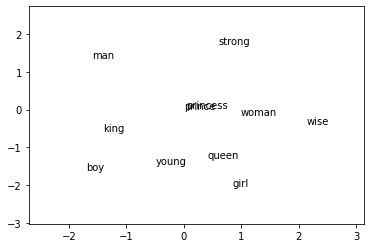

In [ ]:
fig, ax = plt.subplots() # 그림판 생성
for word, x1, x2 in zip(w2v_df['word'], w2v_df["x1"], w2v_df['x2']) :
  ax.annotate(word, (x1,x2))
PADDING = 1.0
x_axis_min = np.amin(embedding_vector, axis=0)[0] - PADDING
y_axis_min = np.amin(embedding_vector, axis=0)[1] - PADDING
x_axis_max = np.amax(embedding_vector, axis=0)[0] + PADDING
y_axis_max = np.amax(embedding_vector, axis=0)[1] + PADDING
plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)
plt.show() # 그림 보여주기

https://word2vec.kr/search/

### Word2vec 클래스 사용하기
- skip-gram, CBOW중에 하나 선택가능
- 네거티브 샘플링 => 학습의 효율성 증가

In [1]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
import pandas as pd
review_data = pd.read_csv('./data/ratings_train.csv')
review_data.dropna(inplace=True)
review_text = review_data['document']  # 리뷰 텍스트 추출
review_text

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 149995, dtype: object

In [ ]:
review_text_split = [doc.split(' ') for doc in review_text]
review_text_split

In [6]:
from gensim.models import Word2Vec

In [7]:
w2v = Word2Vec(window=5,  # 중심단어를 기준으로 좌우로 5개까지 주변단어로 추출
               min_count=5,  # 전체 말뭉치에서 등장해야하는 최소 빈도
               sg=1,  #0번 CBOW, 1번 skip-gram
               size=100,  # 한개의 단어가 몇개의 숫자로 학습되어 표현될지 결정
               sentences=review_text_split)  #임베딩 학습을 진행할 데이터 설정

In [8]:
# 특정단어 벡터값 꺼내기
w2v.wv.get_vector("영화")

array([-0.01375882,  0.26977637, -0.38425225, -0.21009734, -0.19789785,
       -0.4002098 , -0.1749136 , -0.15377975,  0.1915642 , -0.05293479,
        0.43089384,  0.37620413, -0.30243552,  0.68289125, -0.5805653 ,
       -0.00559922, -0.1693562 , -0.29473355,  0.36634153,  0.15755293,
        0.62638146, -0.14689082,  0.05897471, -0.36402926, -0.05717309,
       -0.0058317 , -0.31234446, -0.09626786,  0.00242633,  0.57238925,
       -0.3584883 , -0.47486493,  0.06978024,  0.07918156,  0.07518549,
        0.12370133,  0.26268882, -0.10821126,  0.34403408,  0.32923043,
        0.29742533, -0.07435525, -0.10032781,  0.18691422,  0.1842174 ,
       -0.20956358,  0.16939169, -0.81991726,  0.23189045, -0.07217423,
        0.1818719 , -0.41776577, -0.28491858,  0.10643353,  0.4710075 ,
        0.28434137,  0.10721233,  0.26473138, -0.11554693, -0.10298689,
       -0.28588116, -0.13808805,  0.00915569,  0.43598828,  0.08172673,
        0.08805778,  0.47105226, -0.10489155, -0.08834848, -0.40

In [14]:
# 특정단어 벡터값 꺼내기
w2v.wv.get_vector("영화")

[('돈이', 0.9346795082092285),
 ('내고', 0.8811328411102295),
 ('아깝다는', 0.8663114309310913),
 ('돈주고', 0.8631833791732788),
 ('아까워서', 0.8561667203903198),
 ('낭비', 0.8548543453216553),
 ('보느니', 0.8536796569824219),
 ('아까워', 0.8498229384422302),
 ('마세요', 0.8463674187660217),
 ('아까운영화', 0.8445973992347717)]

In [15]:
from gensim.models import FastText

In [16]:
fast = FastText(window=5,  # 중심단어를 기준으로 좌우로 5개까지 주변단어로 추출
               min_count=5,  # 전체 말뭉치에서 등장해야하는 최소 빈도
               sg=1,  #0번 CBOW, 1번 skip-gram
               size=100,  # 한개의 단어가 몇개의 숫자로 학습되어 표현될지 결정
               sentences=review_text_split)  #임베딩 학습을 진행할 데이터 설정

In [17]:
# 유사한 단어 확인
fast.wv.most_similar("영화")

[('영화군', 0.8975260257720947),
 ('영화과', 0.8974297046661377),
 ('영화여', 0.8950777649879456),
 ('영화♥', 0.8940443396568298),
 ('영화제', 0.8936296105384827),
 ("영화'", 0.893192708492279),
 ('영화-', 0.8916770815849304),
 ('영화ㅠ', 0.8916450142860413),
 ('영화ㅎ', 0.8912417888641357),
 ('영화;', 0.8908705711364746)]

In [19]:
len(w2v.wv.vocab) # 임베딩 벡터에 있는 단어 수 확인

24003